Feed-Forward Networks
=====

### A basic artifical neuron

 * **Neuron pre-activation** (or input-activation): $a(\mathbf{x}) = b + \sum_i w_i x_i = b + \mathbf{w}^T\mathbf{x}$    
   $w_i$ are called connection *weights*    
   $b$ is *bias*
 
 * **Neuron (output) activation:** $h(\mathbf{x}) = g\left(a(\mathbf{x})\right) = g\left(b + \mathbf{w}^T \mathbf{x}\right)$     
    $g(.)$ is called *activation function*

<img src="figs/single-neuron.png" width="250"> </img>

### Activaiton functions

  * **Linear Activation:** $g(x) = x$   
  * **Sigmoid Activation:** $\displaystyle g(x) = \frac{1}{1+e^{-x}}$    
  * **Hyperbolic Tnagent (Tanh) Activation:** $\displaystyle g(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$    
  * **Rectified Linear Activation:** $g(x) = max(x,0)$    

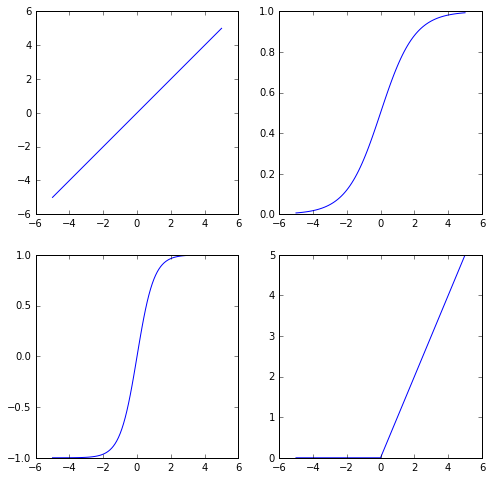

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = np.arange(-5, 5.1, 0.1)

def sigmoid(vec):
    return 1/(1+np.exp(-x))
    
def tanh_activation(vec):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def rectlinear(vec):
    output = vec.copy()
    output[vec<0] = 0
    return output

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(x, x)
plt.subplot(2,2,2)
plt.plot(x, sigmoid(x))
plt.subplot(2,2,3)
plt.plot(x, tanh_activation(x))
plt.subplot(2,2,4)
plt.plot(x, rectlinear(x))
plt.show()

### Binary classification

 * A single neuron with *sigmoid* activation can be interpreted as an estimation of $p(y=1\vert \mathbf{x})$.    
   * $\text{If  }  p(y=1\vert \mathbf{x}) > 0.5 \Rightarrow  \ \text{ predict class=1}$   
   * $\text{If  }  p(y=1\vert \mathbf{x}) < 0.5 \Rightarrow  \ \text{ predict class=0}$   
 This is also known as ***Logistic Regression***
 
 * Similar idea can also be used for *Tanh* actication.

#### Capacity of a single neuron

 * A single neuron can solve problems with linearly separable classes:
 
 
 * But it cannot solve non-linear problems
 
 


## Parameter Learning in Neural Networks


 * based on "Empricial risk minimization"
 
$$arg \min_\theta \frac{1}{T} l(f(x^t;\theta), y^t) + \lambda \Omega (\theta)$$

 * Cost funciton: $l(f(x^t;\theta), y^t)$ (also called risk)
 * Regularizer: $\Omega (\theta)$
 * $\lambda$ is a trade-off between the two terms

 * NN estimates $f(x)_c = p(y=c\vert x)$
  * we want to maximize $\displaystyle \theta^* = arg \max_\theta \frac{1}{T} \prod_t P(y=c\vert x_t) + \lambda \Omega (\theta)$
  * If we have $\prod_t P(y=c\vert x_t)$ it can be re-written as $arg \max_\theta \frac{1}{T} \sum_t \log P(y=c\vert x_t)$. Since $\log$ is a monotonic increasing funciton.
  * another variation: $\displaystyle \theta^* =arg \min \left(- \sum_t \log P(y=c\vert x_t)\right)$
  
  * Numerical instability: since $P(..)$ are small numbers, mulltiplications of such small numbers many times will cause loosing the precision. $\log$ computation will help with nmerical stability.

### Loss functions for classification

 * $0-1$ loss: $l()=\sum_i \mathcal{I}(\hat{y}_i = y_i)$
   * The most ideal, but not practical for optimization
   
   
 
 * Surrogate loss functions
   * Squared loss: $(y-f(x))^2$ (bad loss function, but still used)
   * Logistic loss function $\log \left(1 + e^{-y f(x)}\right)$
   * Hinge loss: $(1 - yf(x))_+$
   * Squared Hinge loss: $(1-yf(x)))^2_+$
   
Notation: $[x]_+ = \max (0, x)$

### Loss functions for regression

 * Euclidean Loss: $\|y - f(x)\|_2^2$
 * Manhattan Loss: $\|y - f(x)\|_1$
 
   * Manhattan loss is more aggressive than Euclidean for values close to zero
   * But less aggressive for larger values
 * Huber Loss: $\left\{\begin{array}{lr} 1/2\|y-f(x)\|_2^2 & for \|y-f(x)\|_2^2 \| \delta^2\\ \delta \|y-f(x)\|_1 - 1/\delta^2 & \text{otherwise}\end{array} \right.$
 
 * KL divergence (if dealing with probabilities): $\sum p_i \log \frac{p_i}{q_i}$

**Note:** In classification, error (risk/missclassification) is determined by product $y_i f(x_i)$. But in regression, it is determined via the difference $y_i-f(x_i)$.

 * Euclidean distance: $\|x - y\|_2^2 = (x-y)^T (x-y)$
 * Mahalanobis metric: $(x-y)^T M (x-y)$

### Loss functions for embeddings

**Embedding:** We want to map vector $x,y$ into a new space $Z$ to get $z_x,z_y$. Then, we compare $z_x,z_y$ in this new space: $$-1 \le \frac{z_x^T z_y}{\|z_x\| \ \|z_y\|} \le +1$$


 * Cosine distance: $\frac{x^T y}{\|x\|\ \|y\|}$
 
 * Triplet loss: $(1 + d(x_i,x_j) - d(x_i,x_k))_+$
   * condier triple points: $i,j,k$
   * $i,k$ are from the same class, while $i,k$ are from two different classes
 

## Regularization

 * $L_2$ regularization: $\Omega(\theta) = \sum\sum\sum W_{i,j}^k$
   * gradient: 
   * 
 * $L_1$ norm: $\Omega(\theta) = \sum\sum\sum |W_{i,j}^k|$
   * Gradient: 
   $$sign(W_{i,j}^k) = \left\{\begin{array}{lr} 1 & for\ W_{i,j}^k>0\\-1 &  for\ W_{i,j}^k<0 \end{array}\right.$$
   * At zero, we have to use sub-gradien: any line between the 
   
 * p-norm:
   * $p=\infty$
   * $p=2$ (same as $L_2$ norm)
   * $p=1$ (same as $L_1$ norm)
   * $0<p<1$
   * $p = 0$

#### Effect of regularizaiton:

**Geometric interpretation:**

 * $\|y-Wx\|_2^2$ form some contours. If $W$ is unit vector, in 2-dimensional, contours are circles. Otherwise, in 2-dimensional, contours form elipse, or in higher dimensions, elipsoid.
 
 * Regularization: $\|y - Wx\|_2^2 + \lambda \|W\|_2^2$
 
   * the solution will be the intersection of above contours, and the contours of unit vectors from the regulariation terms:
 
   * $L_2$: 
   * $L_1$ always intersect at one of the axes $\Rightarrow$ some of the parameters will be zero.
   * For any $p<2$, they have sharp corners. As a result, we get sparse solution.